In [9]:
import pandas as pd

# Load datasets
fear_greed_df = pd.read_csv("fear_greed_index.csv")
trader_data_df = pd.read_csv("historical_data.csv")

In [10]:
trader_data_df['Timestamp IST'] = pd.to_datetime(trader_data_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_data_df['date'] = trader_data_df['Timestamp IST'].dt.date
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date']).dt.date

In [11]:
merged_df = pd.merge(trader_data_df, fear_greed_df[['date', 'classification']], on='date', how='inner')

# Grouping and aggregating
performance_by_sentiment = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'sum'],
    'Size USD': 'sum',
    'Execution Price': 'mean',
    'Account': 'nunique',
    'Side': lambda x: (x == 'BUY').sum() / len(x)  # Buy ratio
})

In [12]:
performance_by_sentiment.columns = [
    'Closed PnL_mean', 'Closed PnL_sum', 'Size USD_sum',
    'Execution Price_mean', 'Unique Traders', 'Buy Ratio'
]

In [13]:
performance_by_sentiment.reset_index(inplace=True)

# Display result
print(performance_by_sentiment)

  classification  Closed PnL_mean  Closed PnL_sum  Size USD_sum  \
0   Extreme Fear        34.537862    7.391102e+05  1.144843e+08   
1  Extreme Greed        67.892861    2.715171e+06  1.244652e+08   
2           Fear        54.290400    3.357155e+06  4.833248e+08   
3          Greed        42.743559    2.150129e+06  2.885825e+08   
4        Neutral        34.307718    1.292921e+06  1.802421e+08   

   Execution Price_mean  Unique Traders  Buy Ratio  
0           7054.795108              32   0.510981  
1           6082.195865              30   0.448590  
2          14152.620222              32   0.489513  
3          13411.276344              31   0.488559  
4          12393.692779              31   0.503343  


C:\Users\Srujana\AppData\Local\Temp\ipykernel_24832\4205178489.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Closed PnL_mean', data=performance_by_sentiment,
C:\Users\Srujana\AppData\Local\Temp\ipykernel_24832\4205178489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Buy Ratio', data=performance_by_sentiment,
C:\Users\Srujana\AppData\Local\Temp\ipykernel_24832\4205178489.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Size USD_sum', data=performance_by_sen

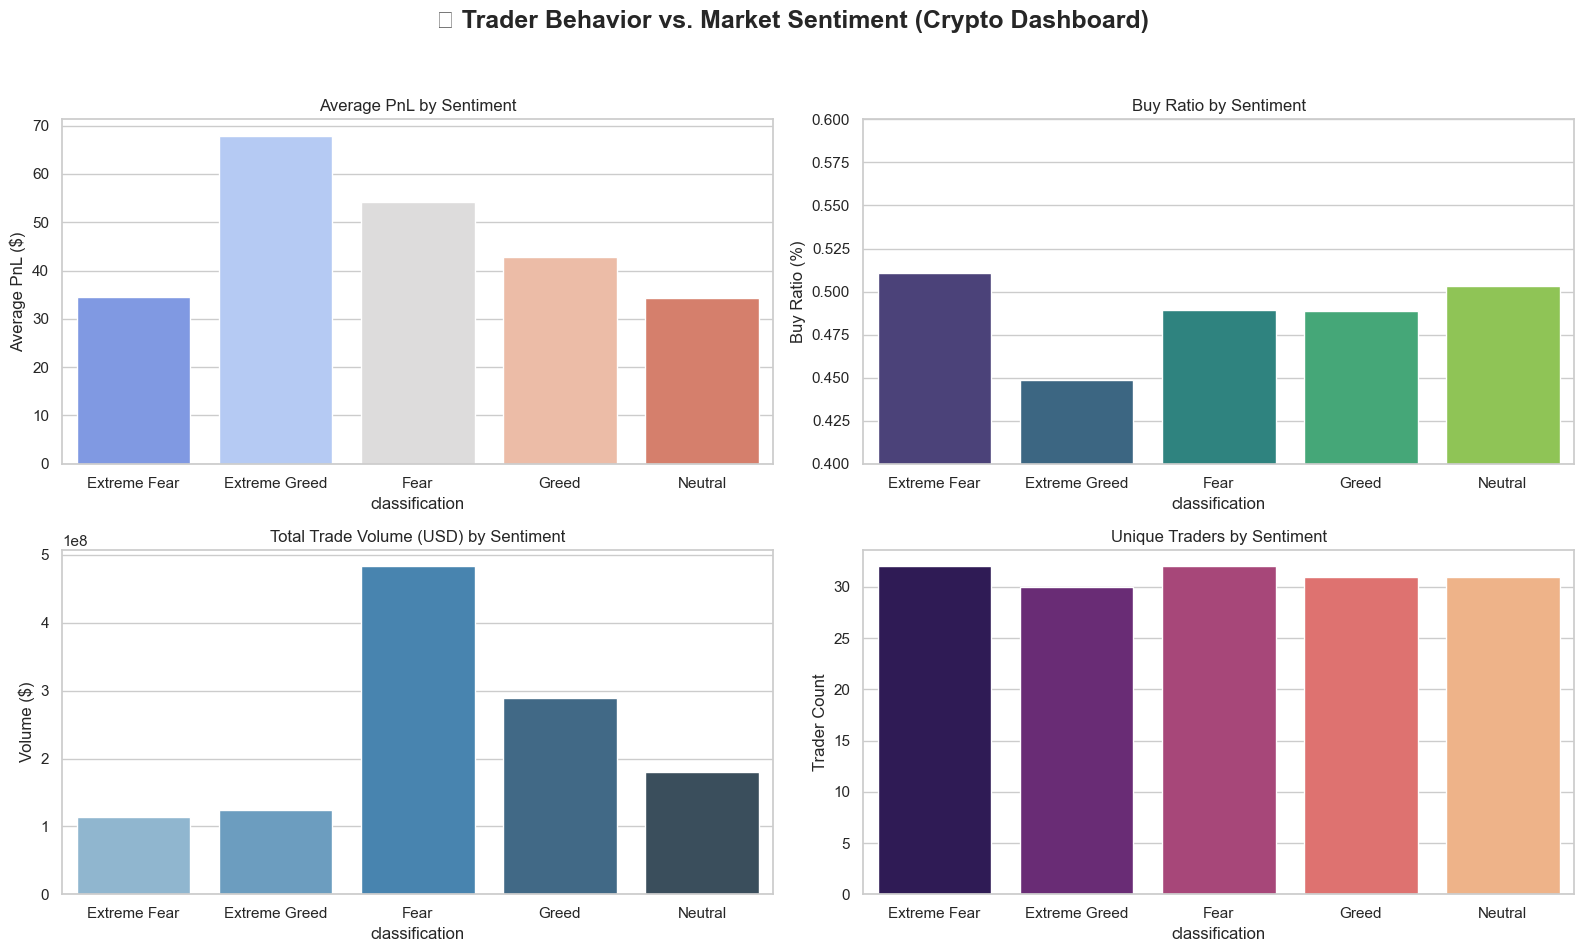

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure these columns exist
performance_by_sentiment.rename(columns={
    'Buy Ratio_<lambda>': 'Buy Ratio',
    'Unique Traders_nunique': 'Unique Traders'
}, inplace=True)

# Plot setup
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Trader Behavior vs. Market Sentiment (Crypto Dashboard)', ...)

# 1. Average PnL
sns.barplot(x='classification', y='Closed PnL_mean',
            data=performance_by_sentiment,
            hue='classification', palette='coolwarm', legend=False, ax=axs[0, 0])


# 2. Buy Ratio
sns.barplot(x='classification', y='Buy Ratio',
            data=performance_by_sentiment,
            hue='classification', palette='viridis', legend=False, ax=axs[0, 1])


# 3. Trade Volume
sns.barplot(x='classification', y='Size USD_sum', data=performance_by_sentiment,
            palette='Blues_d', ax=axs[1, 0])
axs[1, 0].set_title('Total Trade Volume (USD) by Sentiment')
axs[1, 0].set_ylabel('Volume ($)')

# 4. Unique Traders
sns.barplot(x='classification', y='Unique Traders', data=performance_by_sentiment,
            palette='magma', ax=axs[1, 1])
axs[1, 1].set_title('Unique Traders by Sentiment')
axs[1, 1].set_ylabel('Trader Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
